In [56]:
# importa, seta configuracao, le arquivo e tira colunas 'unnamed'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import radviz
from pandas.plotting import parallel_coordinates
import seaborn as sns
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

df = pd.read_csv('dados_filtrados_v3.csv')
df = df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1)

In [57]:
data = df.copy()
filteredCols = 'Forma de saída da opção'
colNames = [c for c in data.columns if c.lower()[:len(filteredCols)] != filteredCols.lower()]
data = data[colNames]

,ID Aluno,Sexo,Data de Nascimento,Cotista,Período de Ingresso na Unb,Período de saída da opção,Ano e Semestre,Média do período,Créditos cursados no total,Créditos cursados no semestre(com aprovação),Código da disciplina,Créditos disciplina,Menção na disciplina,Curso_Ciência da Computação,Curso_Computação,Curso_Engenharia Mecatrônica,Curso_Engenharia de Computação,Curso_Engenharia de Redes de Comunicação,Curso_Engenharia de Software,Curso_Informática,semestre,idade
0,100009,0,1984-05-10,0,20032,20091,20032,3.5,138,22,116301,6,3,0,1,0,0,0,0,0,0.0,19
1,100009,0,1984-05-10,0,20032,20091,20032,3.5,138,22,116793,4,5,0,1,0,0,0,0,0,0.0,19
2,100009,0,1984-05-10,0,20032,20091,20032,3.5,138,22,147389,4,3,0,1,0,0,0,0,0,0.0,19
3,100009,0,1984-05-10,0,20032,20091,20040,3.0,138,2,118010,2,3,0,1,0,0,0,0,0,0.5,19
4,100009,0,1984-05-10,0,20032,20091,20041,3.3,138,18,125156,4,4,0,1,0,0,0,0,0,1.0,20
5,100009,0,1984-05-10,0,20032,20091,20042,3.2,138,18,117251,4,4,0,1,0,0,0,0,0,2.0,20
6,100009,0,1984-05-10,0,20032,20091,20041,3.3,138,18,116319,4,4,0,1,0,0,0,0,0,1.0,20
7,100009,0,1984-05-10,0,20032,20091,20091,4.0,138,28,192562,4,5,0,1,0,0,0,0,0,11.0,25
8,100009,0,1984-05-10,0,20032,20091,20032,3.5,138,22,137481,4,3,0,1,0,0,0,0,0,0.0,19
9,100009,0,1984-05-10,0,20032,20091,20081,2.1,138,6,113042,6,2,0,1,0,0,0,0,0,9.0,24


In [58]:
currentLabel = 'Menção na disciplina'
tam_kluster = len(data[currentLabel].unique())
X = data[data.columns.difference([currentLabel, 'Data de Nascimento'])]
y_columns = data[currentLabel]

In [61]:
kmeans = KMeans(n_clusters=tam_kluster, random_state=42).fit(X)
kmeans.cluster_centers_

array([[ 1.99942963e+04,  1.38777878e-17,  1.81141324e+01,
         1.93710960e+02,  4.44547776e+00,  5.75246473e-01,
         4.81577427e-02,  1.53940772e-01, -3.49997809e-14,
         1.46616471e-01,  3.40283357e-14,  7.60385411e-02,
         1.19408663e+05,  5.55005372e+04,  3.20043238e+00,
         1.99737799e+04,  2.00234587e+04,  1.17673370e-01,
         2.17272117e+01,  4.10727398e+00],
       [ 2.01198892e+04,  1.24423014e-01,  1.67947783e+01,
         1.68676743e+02,  4.28523739e+00,  2.87195021e-01,
         1.46925486e-01,  1.85459941e-01,  1.43298714e-01,
         1.32212331e-01,  1.04908506e-01,  9.91220994e-15,
         1.18365132e+05,  1.63375607e+05,  3.05338567e+00,
         2.01004360e+04,  1.51556867e+04,  1.35385757e-01,
         2.10990974e+01,  3.90524027e+00],
       [ 2.01318892e+04,  1.44281021e-01,  1.77159144e+01,
         1.70853051e+02,  4.21442590e+00,  4.09049814e-02,
         7.21956383e-02,  2.14734614e-01,  8.45663631e-02,
         2.17843833e-01,  3.6

In [62]:
#PCA first

sklearn_pca = sklearnPCA(n_components=2)

Y_sklearn = sklearn_pca.fit_transform(X)

In [66]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

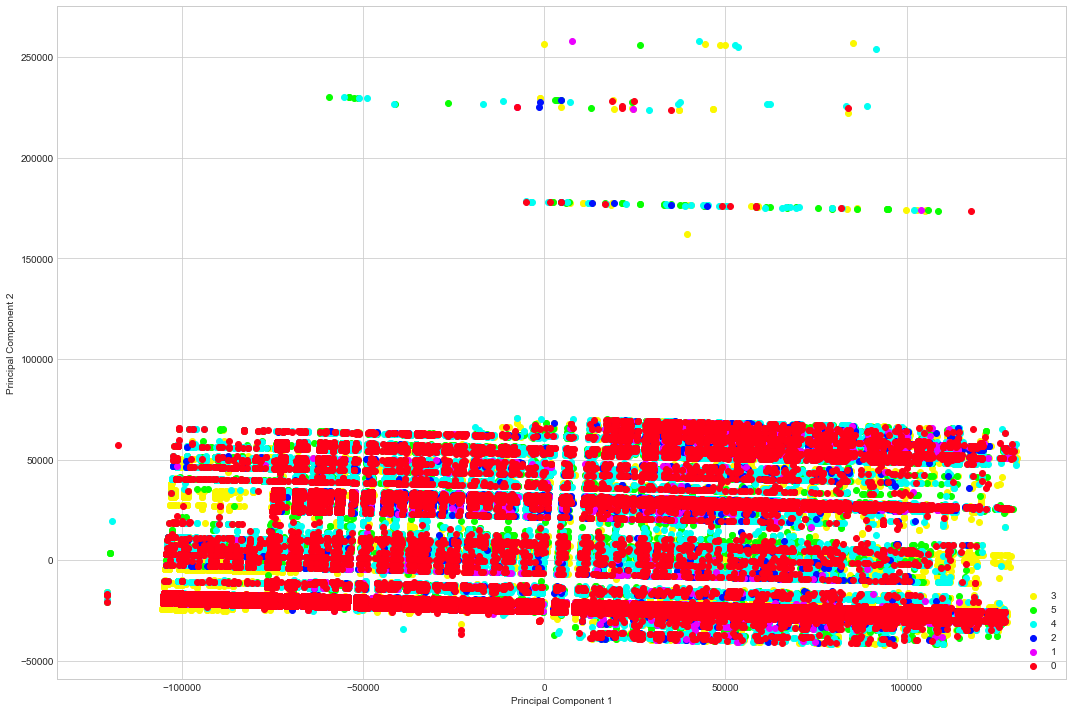

No handles with labels found to put in legend.


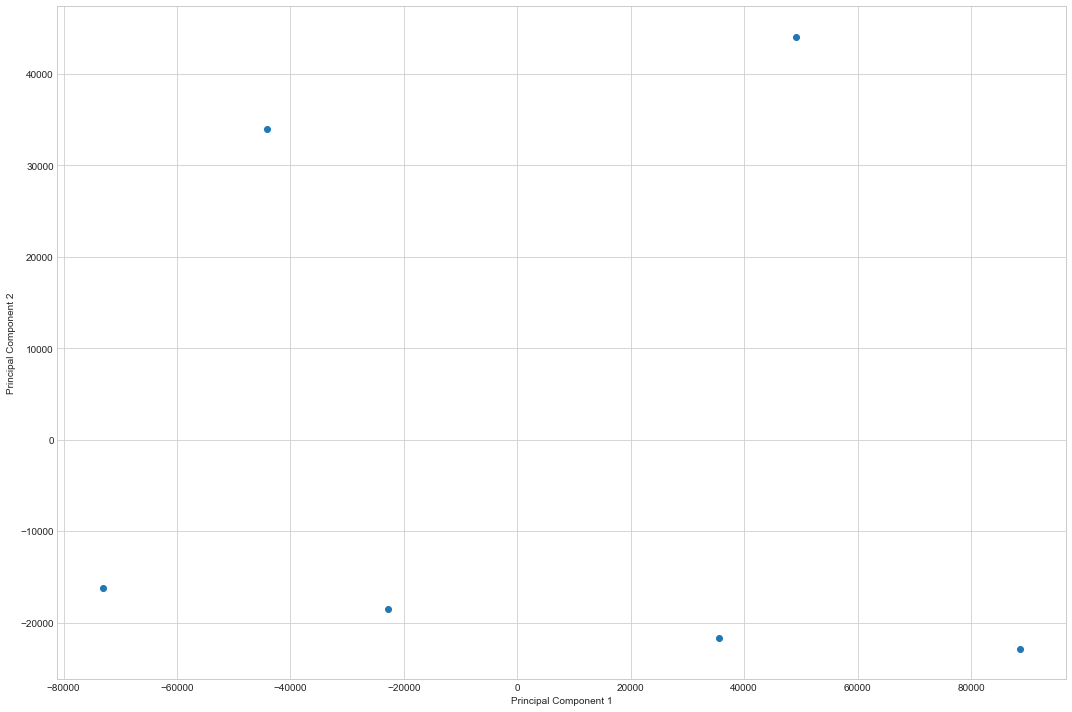

In [74]:
kmeansPCA = KMeans(n_clusters=tam_kluster, random_state=42).fit(Y_sklearn)
kmeansPCA.cluster_centers_


currentLabel = 'Menção na disciplina'
y = data[currentLabel].values
cmap = get_cmap(tam_kluster+1)
colorList = [cmap(i) for i in range(1, tam_kluster+1)]

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(15, 10))
    for lab, col in zip(data[currentLabel].unique(),
                        colorList):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

plt.show()

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(15, 10))
    
    plt.scatter(kmeansPCA.cluster_centers_[:,0],
                    kmeansPCA.cluster_centers_[:,1],
                    )
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()
plt.show()

In [73]:
kmeansPCA.cluster_centers_[:,0]

array([ 49166.5269618 , -73044.00291002,  88599.07324454, -44210.76045905,
        35546.13556561, -22735.92320471])